In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.16.1'

In [2]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(#rotation_range=90,
                                                                brightness_range=(0.5,1),
                                                                #shear_range=0.2,
                                                                #zoom_range=0.2,
                                                                channel_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rescale=1./255,
                                                                validation_split=0.3)

In [9]:
root_dir = '101_ObjectCategories'
img_generator_flow_train = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="training")

img_generator_flow_valid = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="validation")

Found 4499 images belonging to 56 classes.
Found 1897 images belonging to 56 classes.


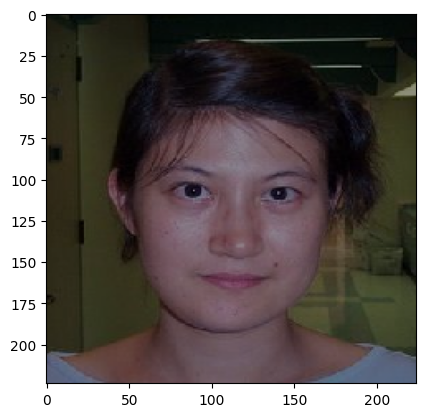

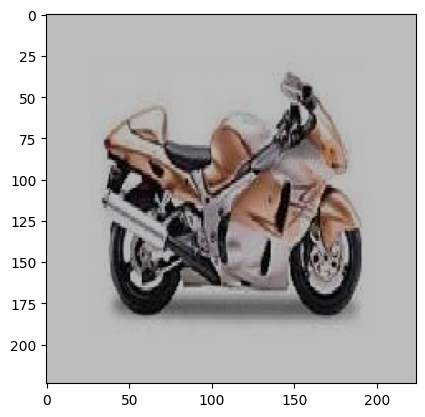

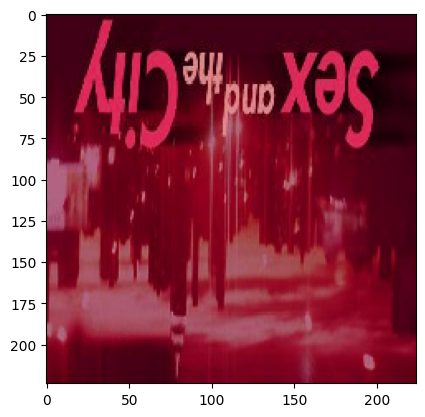

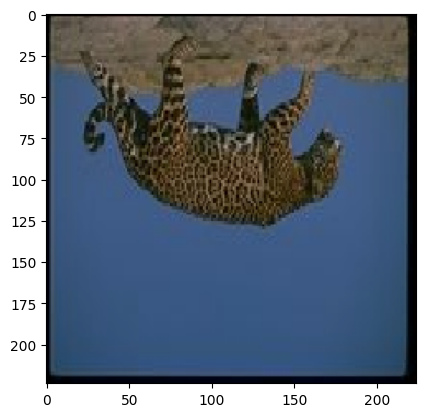

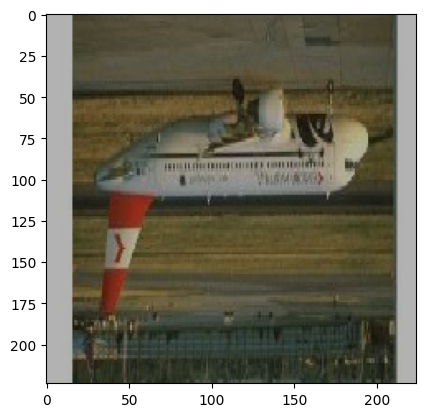

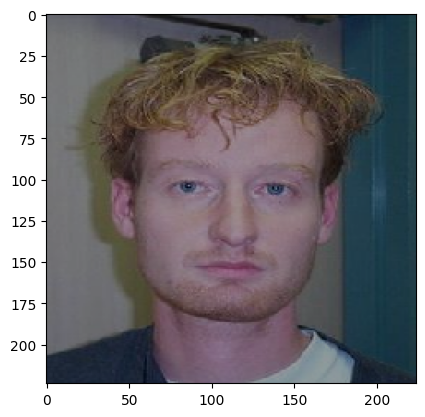

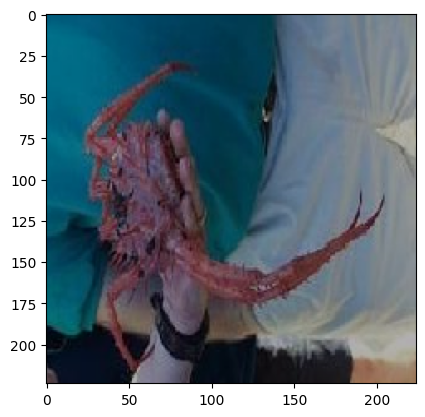

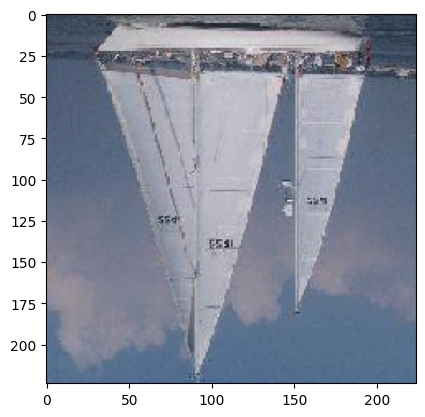

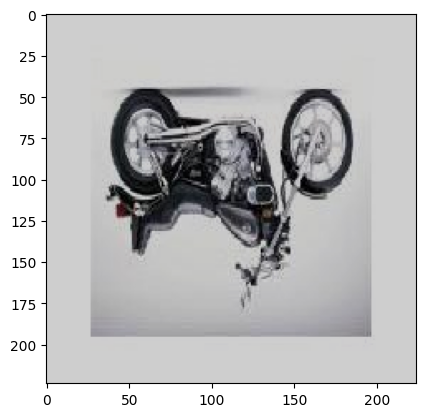

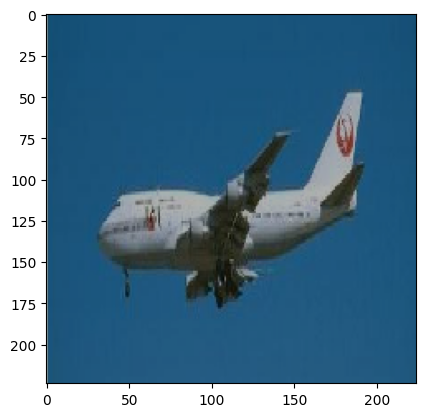

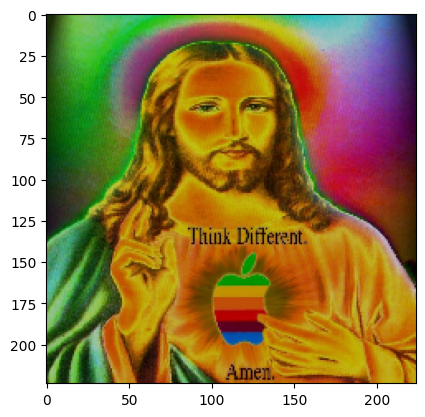

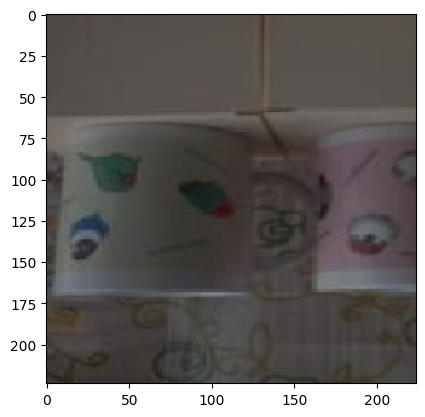

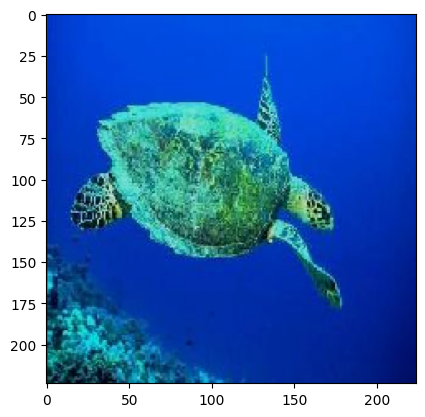

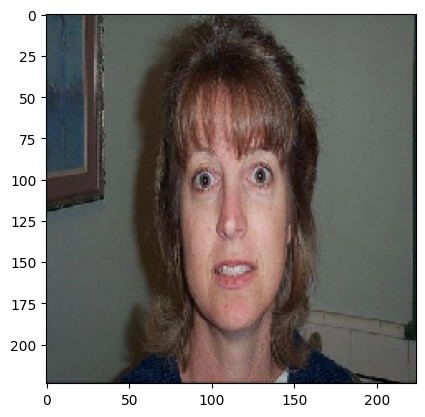

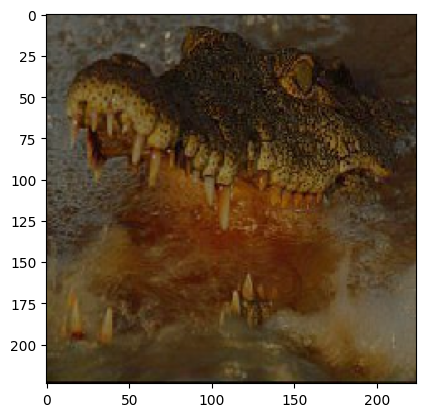

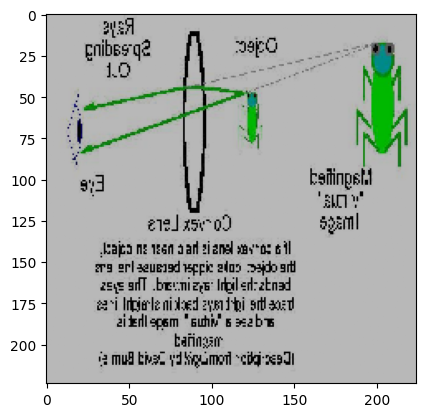

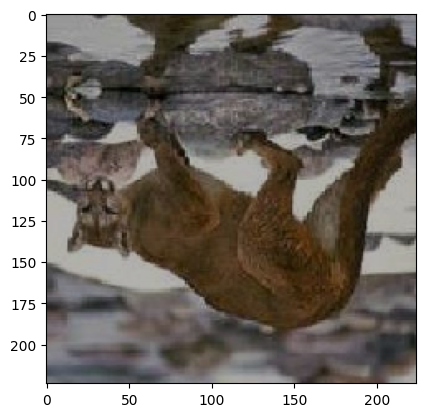

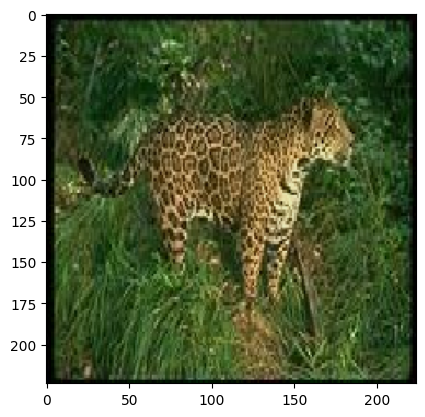

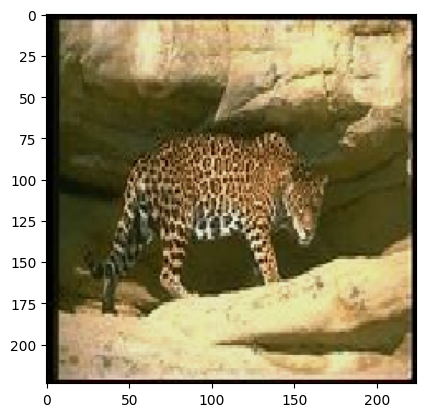

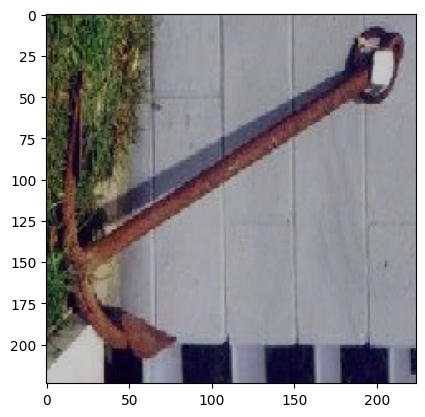

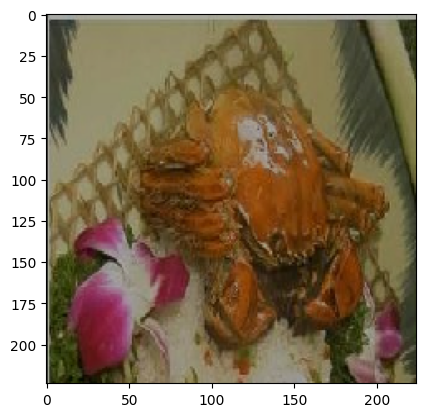

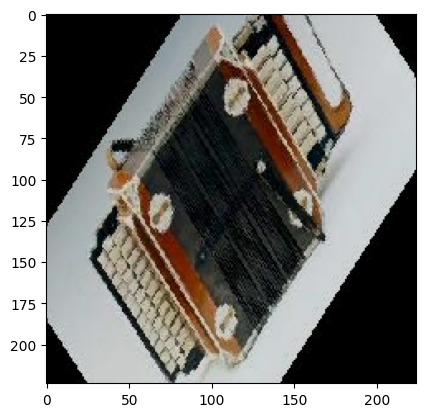

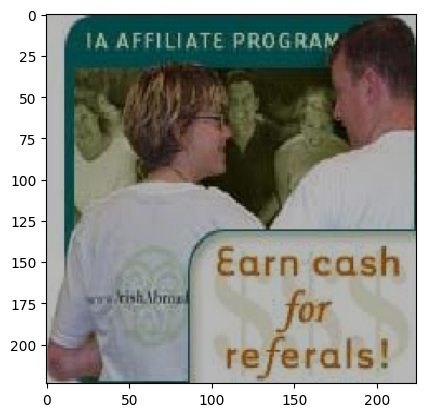

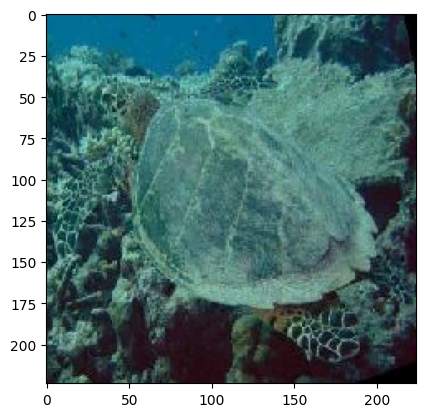

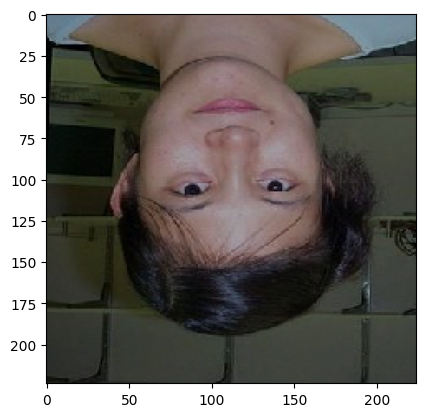

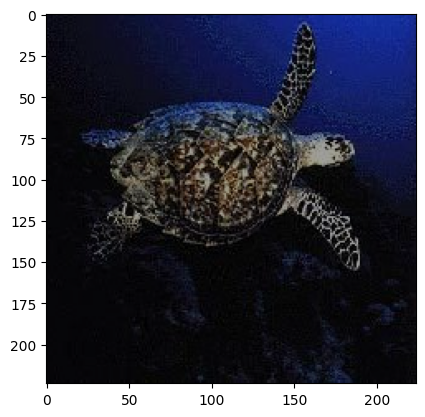

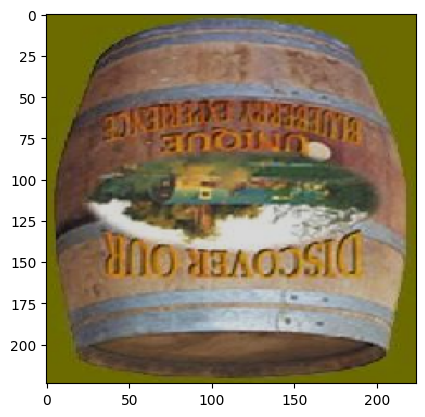

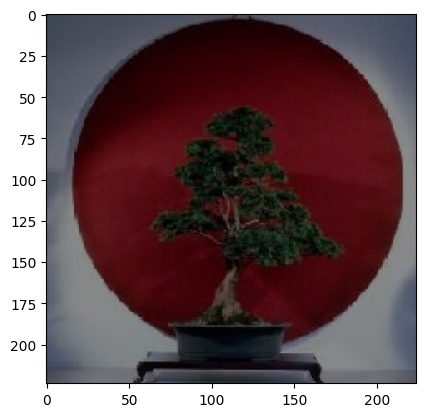

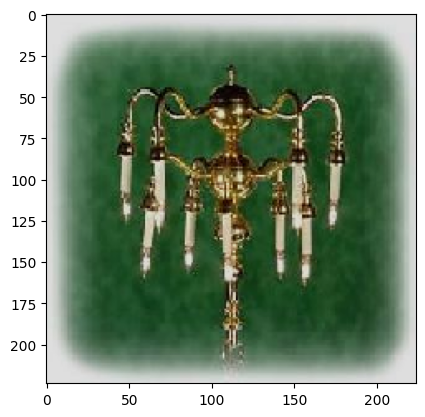

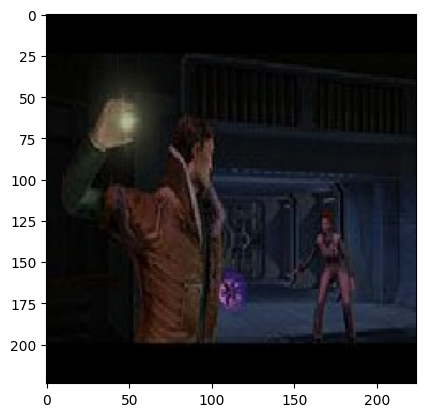

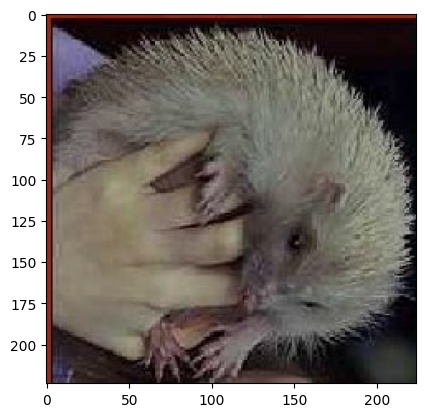

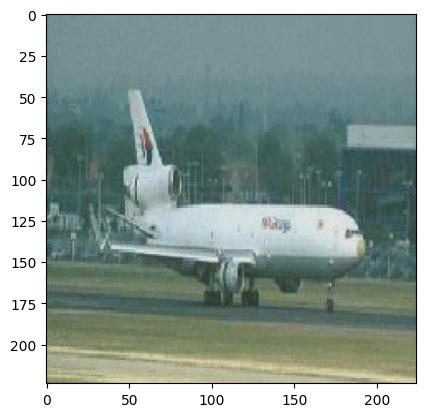

In [10]:
imgs, labels = next(iter(img_generator_flow_train))
for img, label in zip(imgs, labels):
    plt.imshow(img)
    plt.show()

In [11]:
#load a model pretrained 
base_model = tf.keras.applications.InceptionV3(input_shape=(224,224,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )

In [23]:
#freeze parameters 
base_model.trainable = False

In [24]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(56, activation="softmax")
])

In [25]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 2, 2, 2048)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 56)                  │         458,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,592 (84.92 MB)

 Trainable params: 458,808 (1.75 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [29]:
model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, steps_per_epoch=2, epochs=10) #20,50

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 214s 181s/step - categorical_accuracy: 0.4792 - loss: 3.0977 - val_categorical_accuracy: 0.5150 - val_loss: 3.9342
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 167s 165s/step - categorical_accuracy: 0.5000 - loss: 4.1206 - val_categorical_accuracy: 0.4887 - val_loss: 4.7201
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 167s 164s/step - categorical_accuracy: 0.6146 - loss: 5.4648 - val_categorical_accuracy: 0.5656 - val_loss: 4.0339
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 173s 171s/step - categorical_accuracy: 0.6771 - loss: 2.7757 - val_categorical_accuracy: 0.5656 - val_loss: 3.6298
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 171s 168s/step - categorical_accuracy: 0.6042 - loss: 3.8192 - val_categorical_accuracy: 0.5598 - val_loss: 2.9499
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 186s 183s/step - categorical_accuracy: 0.5625 - loss: 4.2668 - val_categorical_accuracy: 0.5551 - val_loss: 2.6565
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 174s 171s/step - categorical_accuracy: 0.6354 - loss: 2.38

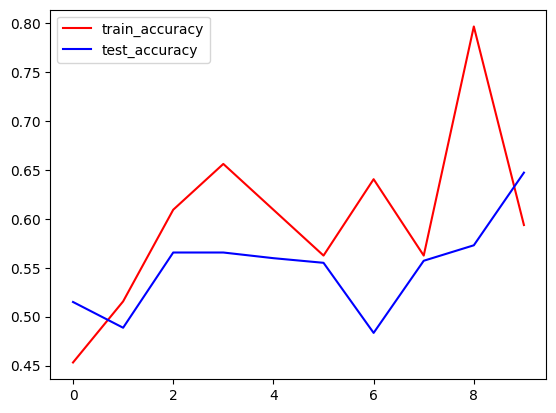

In [30]:
# Visualise train / Valid Accuracy
plt.plot(model.history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

In [3]:
base_model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

NameError: name 'base_model' is not defined

In [5]:
model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, steps_per_epoch=2, epochs=10) #20,50

NameError: name 'model' is not defined